# Ch5: Representation Theory
## 5.1 Group and Representation Theory



Adopted from http://johnkerl.org/doc/kerl-pyaa.pdf. Only very exercises are attempted to demonstrate the ideas. SACK is not a powerful research-level computer-algebra package (such as, say, GAP). Thw Python wrapper for GAP is not installable now, and using its script language directly is much better and edicational.

Downloading https://github.com/johnkerl/sack and extracting in a subfolder

#### Python polymorphism and operator overloading, list data structure ability to carry different element types, and run-time binding, are features that enable groups of different element types, each invoke its own defined operation, such as the multiplication overloading.  

1. Groups are represented as Python Lists
2. Modules are python packages

For example, importing files from the sack subfolder,  is an example of Modules in abstract Algebra.  We onlyn need to add an empty python file nammed "__init__.py". This way we import from foldername.filename.ClassName{ or functionName}. Also we can import from a file in the same folder by omitting the folder name in the import.

Other possible Python examples for Abstract algebra are gappy-system for GAP and 
https://github.com/mhauru/abeliantensors

In [ ]:
# install GAP on your system: https://www.gap-system.org/Releases/4.12.0.html, 
# then install the Python wrapper, did not work, will focus on SACK now, and if this works 
# before publishing, will come back to it. It would have been a better tutorial

#!pip install Cython
#!pip install pytest
#!pip install cysignals
#!pip install gappy-system

## 5.1.3 Group Types

###  This modadd_t class/data type represents elements of a cyclic group on n elements, with the group operation denoted by * modular addition is implemented here as addition mod n for the Cyclic group $C_n∼= \frac {Z}{nZ} $

In [ ]:
class modadd_t:
    def __init__(self, residue, modulus):
        self.residue = residue % modulus
        self.modulus = modulus
    # Use "*" for addition. Seems weird, but groups are abstracted
    # multiplicatively in SACK.
    def __mul__(a,b):
        if (a.modulus != b.modulus):
            print ("Mixed moduli %d, %d" % (a, b))
            sys.exit(1)
        c = modadd_t(a.residue + b.residue, a.modulus)
        return c
    def __eq__(a,b):
        if (a.residue != b.residue):
            return 0
        return 1
    def __ne__(a,b):
        return not (a == b)
    def __str__(self):
        return str(self.residue)
    def inv(a):
        c = modadd_t(-a.residue, a.modulus)
        return c

# in the test example function, number of elements n = 11    
def matest():
    a = modadd_t(5, 11)
    b = modadd_t(8, 11)
    c = a * b
    print (c)
matest()

In [ ]:
# The above class is implemented in the package as modadd_tm
from sack.modadd_tm import modadd_t

a = modadd_t([5], [11])
d = modadd_t([8], [11])

b = modadd_t([5], [10])
e = modadd_t([8], [10])

c = modadd_t([5], [6])
f = modadd_t([8], [6])

# Abstraction Example
# with a and d ∈ C_11, b and e ∈ C_10, and c and f ∈ C_6. 
# Run-time binding means, e Python interpreter will invoke the mul method (* operator) 
# appropriate for each data type

X = [a,b,c] 
Y = [d,e,f]

Z =  [X[0]*Y[0], X[1]*Y[1], X[2]*Y[2]]
print(" Z = [" + str(Z[0]) + ", "+ str(Z[1]) + ", "+ str(Z[2]) + "] ") # from __str__, only residue are printed

## Klein-four group, $V_4 ∼= Z_2 × Z_2$. 

In [ ]:
from sack.v4_tm import v4_t

x = v4_t(3)
y = v4_t(2)
print (str(x)) # prints the Cayley table character for the numeric value the group is initialised with
print (str(y))
z = x * y
print (str(z))
z.scan("a") # scans a character in the groups Cayley table  to its numeric representation
print (str(z))
print ()

for i in range(0, 4):
    for j in range(0, 4):
        x = v4_t(i)
        y = v4_t(j)
        z = x * y
        print ("X = " + str(x) + ", Y = " + str(y) + ", Klein-four X * Y = " + str(z))
    print ()

In [ ]:
# quaternion unit group.

from sack.quatu_tm import quatu_t

x = quatu_t(3)
y = quatu_t(2)
print (str(x)) # prints the Cayley table character for the numeric code value the group is initialised with
print (str(y))
z = x * y
print (str(z))
z.scan("k") # scans a character in the groups Cayley table  to its numeric code representation
print (str(z))
print ()

for i in range(0, 8):
    for j in range(0, 8):
        x = quatu_t(i)
        y = quatu_t(j)
        z = x * y
        print ("X = " + str(x) + ", Y = " + str(y) + ", quaternion X * Y = " + str(z))
    print ()

### Symmtric Groups $S_n$ in cycle notation can be represented as image-map format in software implementation. For example,
$σ = (1234)(567) =  \left ( \begin{matrix}
1 2 3 4 5 6 7 \\
2 3 4 1 6 7 5 \end{matrix} \right ) $


Here, 1 maps to 2, 2 maps to 3, 5 maps to 6, etc. Note that the top row of the image map
always consists of the numbers 1 through n, and thus may be omitted.

In [ ]:
from sack.pmti_tm import pmti_t

x = pmti_t([2, 3, 1], 3)
y = pmti_t([1, 3, 2], 3)

print ("X = " + str(x))
print ("X parity = " + str(x.parity())) # 0 for even, 1 for odd
print ("X sign = " + str(x.sgn())) # : 1 for even, -1 for odd.

print ("Y = " + str(y))
print ("Y parity = " + str(y.parity())) # 0 for even, 1 for odd
print ("Y sign = " + str(y.sgn())) # : 1 for even, -1 for odd.
z = x * y
z.scan("1,2,3,4", 4)
print ("Z = " + str(z))

## 5.1.3.2 Geometric groups:

### The dihedral group $D_n$ is the symmetry group on a plane n-gon. It has order 2n and is given by the following representation:

$D_n = <ρ, φ | ρ^n = φ^2 = 1, φρ = ρ^{n−1}φ>.$

The element ρ (rho for rotate) has order n; the element φ (phi for flip) has order 2.
The repeated use of the final relation enables any element of $D_n$ to be put into the form $ρ^iφ^j$ for i = 0, 1, 2, . . . , n − 1 and j = 0, 1.

Given two elements $ρ^iφ^j$ and $ρ^kφ^l$  of Dn, we obtain the product:

j = 0 : $ρ^iρ^kφ^l = ρ^{i+k}φ^l$

j = 1 : $ρ^iφρ^kφ^l = ρ^{i−k}φ^{l+1}$

Similar definitions for the  Metacyclic (metacyc_t) and generalized-quaternion groups (genquat_t)

In [ ]:
from sack.dih_tm import dih_t

# rho = 2, flip = 3, n=2
x = dih_t(2, 3, 2)
# rho = 3, flip = 3, n=2
y = dih_t(3, 3, 2)

print ("X = " + str(x)) # prints the Cayley table character for the numeric code value the group is initialised with
print ("Inv(X) = " + str(x.inv()))
print ("Y = " + str(y))
z = x * y # multiplication is only defined on = n
print ("X*Y = " + str(z))
z.scan("2,3", 3) # scans a rho and flip from the string, and n in the last argument
print ("Z = " + str(z))
print ()

for i in range(0, 4):
    for j in range(0, 4):
        x = dih_t(i+1, j+1, i+1) # just trying different combinations
        y = dih_t(j+1, i+1, i+1)
        z = x * y
        print ("X = " + str(x) + ", Y = " + str(y) + ", dihedral X * Y = " + str(z))
    print ()

In [ ]:
from sack.sackgrp import * # this python file include other group useful functions
# other interesting group functions in this module such: as is_group, print_cayley_table, left_cosets, 
if (is_group(Z)): 
    print("is a group") # all axioms are true (closed, associative, unique identity, inverse)
else:
    print("not a group")
    


## 5.2 Harmonic analysis 





The dataset is from https://zenodo.org/record/1188976#.YyR473bMJEY

Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_7984/4177351705.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  h_samplerate, HappySignal = wavfile.read('data/Actor_01/03-01-03-01-01-01-01.wav')
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_7984/4177351705.py:15: WavFileWarning: Chunk (non-data) not understood, skipping it.
  a_samplerate, AngrySignal = wavfile.read("data/Actor_01/03-01-05-02-01-02-01.wav")


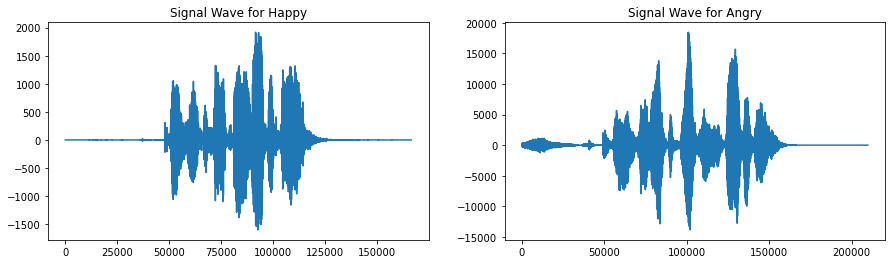

In [9]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile

################# Load Happy and Angry example of Actor 1 #####################################


h_samplerate, HappySignal = wavfile.read('data/Actor_01/03-01-03-01-01-01-01.wav')

plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.title("Signal Wave for Happy")
plt.plot(HappySignal)

a_samplerate, AngrySignal = wavfile.read("data/Actor_01/03-01-05-02-01-02-01.wav")

plt.subplot(1, 2, 2)
plt.title("Signal Wave for Angry")
plt.plot(AngrySignal)

plt.show()



In [10]:
#!pip install sounddevice

In [ ]:
import sounddevice as sd

sd.play(HappySignal, h_samplerate)

In [ ]:
sd.play(AngrySignal, a_samplerate)

### 5.2.1 Fourier transforms 

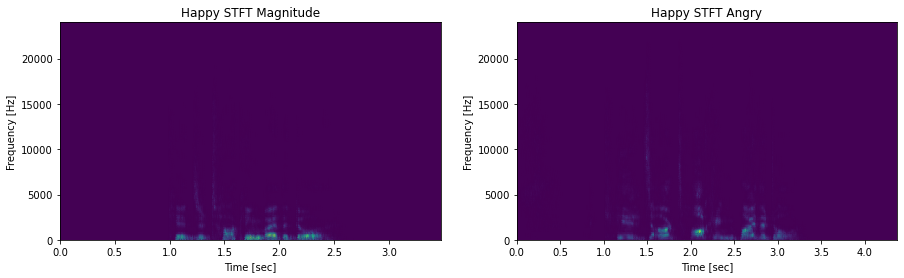

In [11]:
# Compute and plot the STFT’s magnitude.
from scipy import signal

h_f, h_t, h_Zxx = signal.stft(HappySignal, h_samplerate)
plt.figure(figsize=(15,4))
plt.subplot(1, 2, 1)
plt.pcolormesh(h_t, h_f, np.abs(h_Zxx), shading='gouraud')
plt.title('Happy STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')


a_f, a_t, a_Zxx = signal.stft(AngrySignal, a_samplerate)
plt.subplot(1, 2, 2)
plt.pcolormesh(a_t, a_f, np.abs(a_Zxx), shading='gouraud')
plt.title('Happy STFT Angry')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [12]:
_, h_reconstructed = signal.istft(h_Zxx, h_samplerate)
h_reconstructed = np.resize(h_reconstructed, HappySignal.shape)
stft_HappyReconError = np.square(np.subtract(HappySignal,h_reconstructed)).mean()
print (stft_HappyReconError)

_, a_reconstructed = signal.istft(a_Zxx, a_samplerate)
a_reconstructed = np.resize(a_reconstructed, AngrySignal.shape)
stft_AngryReconError = np.square(np.subtract(AngrySignal,a_reconstructed)).mean()
print (stft_AngryReconError)

5.067094e-10
2.7690108e-08


In [ ]:
sd.play(h_reconstructed, h_samplerate)

In [ ]:
sd.play(a_reconstructed, a_samplerate)

### 5.2.3 Wavelet Analysis

### https://ataspinar.com/2018/12/21/a-guide-for-using-the-wavelet-transform-in-machine-learning/

In [13]:
import pywt

def cwt (signal, wavelet):
    t0=1871
    dt=0.25
    time = np.arange(0, signal.shape[0]) * dt + t0
    scales = np.arange(1, 128)
    [coefficients, frequencies] =pywt.cwt(signal, scales, wavelet, dt)
    return coefficients, frequencies, time

In [14]:
def plot_cwt(coefficients, frequencies, title, time, ax):
    ylabel = 'Period (years)' 
    xlabel = 'Time'
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=plt.cm.seismic)
    
    ax.set_title(title, fontsize=18)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")


C:\ProgramData\Anaconda3\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_7984/896176808.py:10: RuntimeWarning: divide by zero encountered in log2
  im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=plt.cm.seismic)


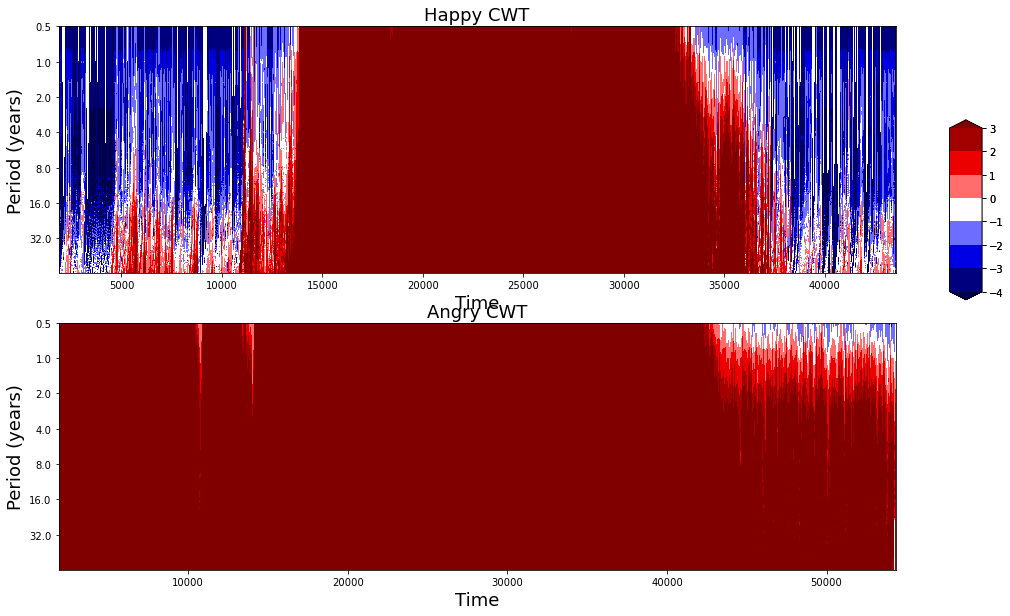

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plt.subplot(2, 1, 1)
wavelet = 'cmor' # 'db2'
coefficients, frequencies, time = cwt (HappySignal, wavelet)
plot_cwt(coefficients, frequencies, "Happy CWT", time, ax[0])

plt.subplot(2, 1, 2)
coefficients, frequencies, time = cwt (AngrySignal, wavelet)
plot_cwt(coefficients, frequencies, "Angry CWT", time, ax[1])
plt.show()



1.2358689534472845e-27
6.787497196283978e-26


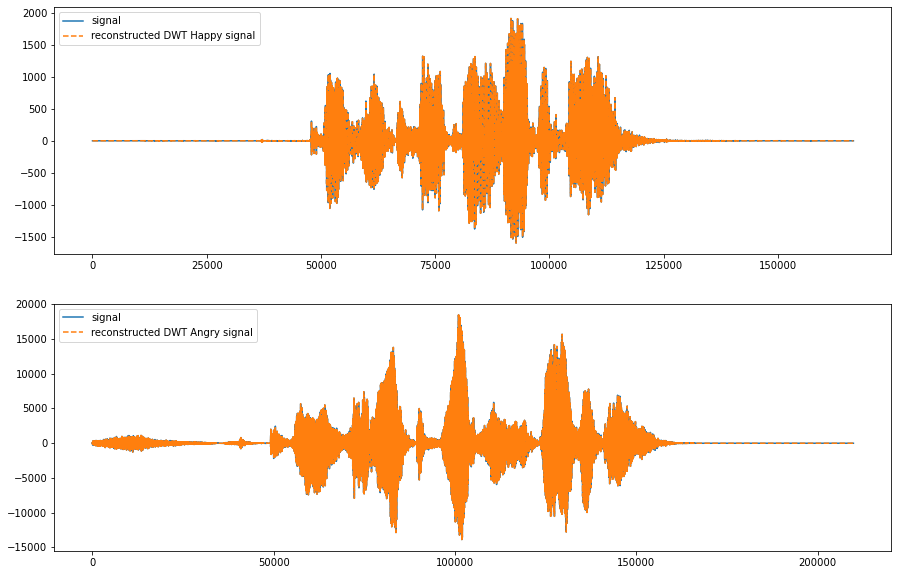

In [16]:
# We cannot reconstruct from continous signal wavelet decomposition, 
# We will do the discrete wavelet transform, 

(cA1, cD1) = pywt.dwt(HappySignal, 'db2', 'smooth')
h_reconstructed_DWT = pywt.idwt(cA1, cD1, 'db2', 'smooth')
h_reconstructed_DWT = np.resize(h_reconstructed_DWT, HappySignal.shape)
dwt_HappyReconError = np.square(np.subtract(HappySignal,h_reconstructed_DWT)).mean()
print (dwt_HappyReconError)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plt.subplot(2, 1, 1)
ax[0].plot(HappySignal, label='signal')
ax[0].plot(h_reconstructed_DWT, label='reconstructed DWT Happy signal', linestyle='--')
ax[0].legend(loc='upper left')


(cA1, cD1) = pywt.dwt(AngrySignal, 'db2', 'smooth')
a_reconstructed_DWT = pywt.idwt(cA1, cD1, 'db2', 'smooth')
a_reconstructed_DWT = np.resize(a_reconstructed_DWT, AngrySignal.shape)
dwt_AngryReconError = np.square(np.subtract(AngrySignal,a_reconstructed_DWT)).mean()
print (dwt_AngryReconError)
plt.subplot(2, 1, 2)
ax[1].plot(AngrySignal, label='signal')
ax[1].plot(a_reconstructed_DWT, label='reconstructed DWT Angry signal', linestyle='--')
ax[1].legend(loc='upper left')

plt.show()

In [17]:
cA1.shape

(104906,)

In [ ]:
sd.play(h_reconstructed_DWT, h_samplerate)

In [ ]:
sd.play(a_reconstructed_DWT, a_samplerate)

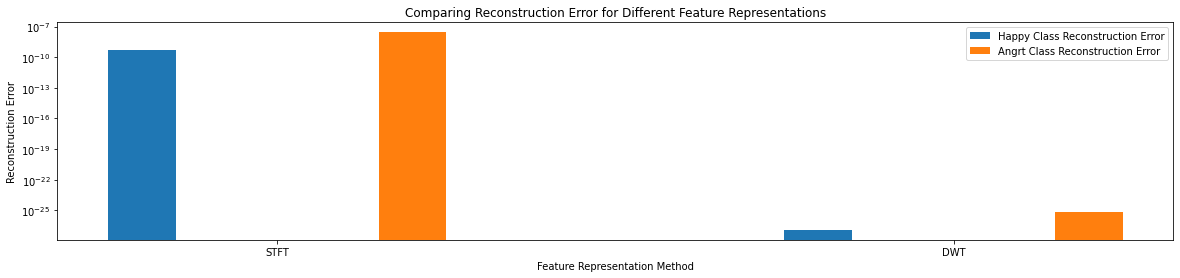

In [25]:
FeatureRepMethod = ["STFT", "DWT"]
HappyReconError = [stft_HappyReconError, dwt_HappyReconError]
AngryReconError = [stft_AngryReconError, dwt_AngryReconError]

import matplotlib.pyplot as plt
%matplotlib inline

x_pos = np.arange(len(FeatureRepMethod))

fig, axes = plt.subplots(figsize=(20,4))
plt.bar(x_pos-0.2, HappyReconError, 0.1, label = 'Happy Class Reconstruction Error')
plt.bar(x_pos+0.2, AngryReconError, 0.1, label = 'Angrt Class Reconstruction Error')

  
plt.xticks(x_pos, FeatureRepMethod)
plt.xlabel("Feature Representation Method")
plt.ylabel("Reconstruction Error")
axes.set_yscale("log") #the log transformation
plt.title("Comparing Reconstruction Error for Different Feature Representations") # Stft has much worse reconstruction error
plt.legend()
plt.show()

## There are other Audio encoding that usually 
## captrue more suitable audio file representations
## such as:
discrete cosine transform (DCT) 
Mel Spectrograms : 
Spectrogram with consecutive Fourier transforms: scipy.signal.spectrogram
Mel-Frequency Cepstral Coefficients
Chromagram

Other forms of optimisation, like removing noise, or sometimes adding noise for regularisaition, can all contribute to better performance. To keep code simpler, we will attempt classification using the STFT and DWT only and compare performance.

In [21]:
#!pip install sklearn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 5.0 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 4.8 MB/s eta 0:00:007.4 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=b7b93b0db4d3c641d3d03b01c0e298a73c6fbb042a64540009bd3e0106be96af
  Stored in directory: /home/manal/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [1]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
import pywt

#Emotions in the RAVDESS dataset
emotions ={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

def get_features(file):
    # load an individual soundfile
    sample_rate, waveform = wavfile.read(file)
    h_f, h_t, h_Zxx = signal.stft(waveform, sample_rate)
    #h_Zxx = h_Zxx.flatten()
    (cA1, cD1) = pywt.dwt(waveform, 'db2', 'smooth')
    #cA1 = cA1.flatten()
    #cD1 = cD1.flatten()   
    
    feature_stft=np.array([])
    # use np.hstack to stack our feature arrays horizontally to create a feature matrix
    feature_stft = np.hstack(h_Zxx.flatten())
    feature_cA1=np.array([])
    feature_cA1 = np.hstack(cA1.flatten())
    feature_cD1=np.array([])
    feature_cD1 = np.hstack(cD1.flatten())    
    return feature_stft, feature_cA1, feature_cD1

In [2]:
import os, glob

def load_data():
    X_stft, X_dwtC,X_dwtDC, y=[],[],[],[]
    count = 0
    for file in glob.glob("data/Actor_*//*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        features1, features2, features3 = get_features(file)
        X_stft.append(features1) # Stft features only
        X_dwtC.append(features2) # DWT features cofficients only
        X_dwtDC.append(features3) # DWT features deep cofficients only
        y.append(emotion)
        count += 1
        # '\r' + end='' results in printing over same line
        print('\r' + f' Processed {count}/{1440} audio samples',end=' ')
    # Return arrays to plug into sklearn's cross-validation algorithms
    return X_stft, X_dwtC, X_dwtDC, y

X_stft, X_dwtC, X_dwtDC, y = load_data()

/tmp/ipykernel_9593/646808383.py:20: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, waveform = wavfile.read(file)


 Processed 215/1440 audio samples 

/home/manal/.local/lib/python3.8/site-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


 Processed 1440/1440 audio samples 

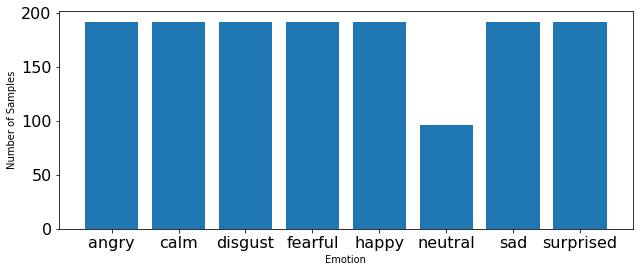

In [17]:
import matplotlib.pyplot as plt

# plot emotions
plt.figure(figsize=(35,4))
plt.subplot(1,3,1)
#np.unique returns ordered list of unique elements and count of each element
emotion_list, count = np.unique(y, return_counts=True)
plt.bar(x=range(8), height=count)
plt.xticks(ticks=range(8), labels = [emotion for emotion in emotion_list],fontsize=10)
plt.xlabel('Emotion')
plt.tick_params(labelsize=16)
plt.ylabel('Number of Samples')
plt.show()

In [3]:
def matriciseFeatures (X):
    max = 0
    for i in range (len(X)):
        if X[i].shape[0] > max:
            max = X[i].shape[0]
    XX= []
    for i in range (len(X)):
        s = np.array (X[i])
        s = np.resize(s, max)
        XX.append(s)
    XX = np.array (XX)
    print (XX.shape)
    return XX

In [4]:
X_stft = matriciseFeatures (X_stft)
X_dwtC = matriciseFeatures (X_dwtC)
X_dwtDC = matriciseFeatures (X_dwtDC)

(1440, 1258854)
(1440, 419618)
(1440, 419618)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_stft = scaler.fit_transform(X_stft.real)
X_dwtC = scaler.fit_transform(X_dwtC)
X_dwtDC = scaler.fit_transform(X_dwtDC)


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from time import time

# the dataset has 1440 audio file, all feature extraction mathods generate many values for every file as seen in shape printing in matrcisaition
# the following classifiers are all set on the lowest parameters, increasing iterations, layers and depth, number of estimators, 
# regularisation parameters, other setting should increase the accuracy achieved. 
# consider automatic fine tuning of parameters

# the following only show how performance changes when features are extracted using different representation
# others concatenate all these different feature extraction methods (stft, dwt, spectrogram, mfcc, .... etc)
# horiazontally to enable classifiers finding the most discriminating features among all. These might differ from 
# one dataset to another, and from one classification algorithm to another

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process", # this is very slow, consider commenting out if not on a fast computer
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost", # this is the second slowest, consider commenting out if not on a fast computer
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)), # this is very slow, consider commenting out if not on a fast computer
    DecisionTreeClassifier(max_depth=2),
    RandomForestClassifier(max_depth=2, n_estimators=2, max_features=1),
    MLPClassifier(alpha=1, max_iter=2),
    AdaBoostClassifier(), # this is second slowest, consider commenting out if not on a fast computer
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

def compareModels (X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)
    learnTime, score = [], []
    for name, clf in zip(names, classifiers):
        start= time()
        clf.fit(X_train, y_train)
        learnTime.append(time()-start)
        print (" clf: " + name + " learnTime = " +str(learnTime[len(learnTime)-1]))
        start= time()
        score1 = clf.score(X_test, y_test) 
        print (" score = " + str(score1) + " in " + str(time()-start) )
        score.append(score1)
    
    return score, learnTime

In [31]:
stft_score, stft_learnTime = compareModels (X_stft, y)


 clf: Nearest Neighbors learnTime = 6.523072957992554
 score = 0.13194444444444445 in 789.330155134201
 clf: Linear SVM learnTime = 2239.9565012454987
 score = 0.13541666666666666 in 233.9917562007904
 clf: RBF SVM learnTime = 1845.867311000824
 score = 0.11805555555555555 in 2809.182865858078


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 clf: Gaussian Process learnTime = 12998.663620710373
 score = 0.11805555555555555 in 1559.7494747638702
 clf: Decision Tree learnTime = 269.72395491600037
 score = 0.1423611111111111 in 0.2526736259460449
 clf: Random Forest learnTime = 1.0748169422149658
 score = 0.12152777777777778 in 0.2685856819152832


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


 clf: Neural Net learnTime = 31.200265645980835
 score = 0.19791666666666666 in 0.5775916576385498
 clf: AdaBoost learnTime = 6637.967088460922
 score = 0.19791666666666666 in 12.978172063827515
 clf: Naive Bayes learnTime = 7.24346923828125
 score = 0.2465277777777778 in 18.289345026016235


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


 clf: QDA learnTime = 306.20986557006836
 score = 0.13541666666666666 in 7.932264089584351


In [7]:
dwtC_score, dwtC_learnTime = compareModels (X_dwtC, y)


/home/manal/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 clf: Gaussian Process learnTime = 2723.0790464878082
 score = 0.12152777777777778 in 458.4064860343933
 clf: Decision Tree learnTime = 81.19836735725403
 score = 0.1597222222222222 in 0.15889668464660645
 clf: Random Forest learnTime = 0.8245458602905273
 score = 0.1527777777777778 in 0.15880417823791504


/home/manal/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


 clf: Neural Net learnTime = 17.42845582962036
 score = 0.10069444444444445 in 0.3424232006072998
 clf: AdaBoost learnTime = 2100.7681033611298
 score = 0.2222222222222222 in 7.885491371154785
 clf: Naive Bayes learnTime = 6.829381227493286
 score = 0.3298611111111111 in 5.026338815689087


/home/manal/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


 clf: QDA learnTime = 105.56209802627563
 score = 0.14583333333333334 in 5.473020792007446


In [7]:
dwtDC_score, dwtDC_learnTime = compareModels (X_dwtDC, y)


/home/manal/.local/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


 clf: Gaussian Process learnTime = 11750.665244340897
 score = 0.11805555555555555 in 459.52876019477844
 clf: Decision Tree learnTime = 67.40228509902954
 score = 0.14930555555555555 in 0.1542825698852539
 clf: Random Forest learnTime = 0.8243024349212646
 score = 0.1423611111111111 in 0.1545271873474121


/home/manal/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2) reached and the optimization hasn't converged yet.
  warnings.warn(


 clf: Neural Net learnTime = 17.055216312408447
 score = 0.10069444444444445 in 0.3132355213165283
 clf: AdaBoost learnTime = 1733.8889164924622
 score = 0.2465277777777778 in 10.246487379074097
 clf: Naive Bayes learnTime = 6.380509376525879
 score = 0.2604166666666667 in 4.947436809539795


/home/manal/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


 clf: QDA learnTime = 104.62977313995361
 score = 0.13194444444444445 in 5.144797325134277


### The following comparison chart shows an example of basic models against each feature extraction representation method:



<img src="compFeaturesAndModels.png">

In case, your computer can not run all these models in the previous three cells (it took make several rounds to collect the mterics below), a sample collected metrics can be including by turning the cell below into code cell and run it to rerun the graph

### It is obvious that STFT because it generates more features this makes learning time in red bars are always higher for all models. The model complexity itself affect the learning time, and the slowest is Gaussian Proccesses and ADABOOST.  The accuracy of some models are better for STFT representation (blue bars), but other models are better with DWT coff (orange). The DWT deep coffs (green) seem comparable to the first group of DWT coffs, and could be concatented together for better representation. All models accuracy are obviously very low, because of the very low parameterisation of these models to learn faster on a normal computer ( i7-1185G7 @ 3.00GHz  + Nvidia/Quadro  T500 + 64 GB RAM). More iterations, slower learning rate, deeper layers, and other parameters can increase the accuracy.



stft_score, stft_learnTime = [], []

stft_learnTime.append(6.523072957992554)
stft_score.append(0.13194444444444445)

stft_learnTime.append(2239.9565012454987)
stft_score.append(0.13541666666666666)
stft_learnTime.append(1845.867311000824)
stft_score.append(0.11805555555555555)


stft_learnTime.append(12998.663620710373)
stft_score.append(0.11805555555555555)
stft_learnTime.append(269.72395491600037)
stft_score.append(0.1423611111111111)
stft_learnTime.append(1.0748169422149658)
stft_score.append(0.12152777777777778)


stft_learnTime.append(31.200265645980835)
stft_score.append(0.19791666666666666)
stft_learnTime.append(6637.967088460922)
stft_score.append(0.19791666666666666)
stft_learnTime.append(7.24346923828125)
stft_score.append(0.2465277777777778)


stft_learnTime.append(306.20986557006836)
stft_score.append(0.13541666666666666)

dwtC_score, dwtC_learnTime = [],[]

dwtC_learnTime.append(0.27277231216430664)
dwtC_score.append(0.10069444444444445)
dwtC_learnTime.append(280.72698950767517)
dwtC_score.append(0.125)
dwtC_learnTime.append(301.32664680480957)
dwtC_score.append(0.10069444444444445)
dwtC_learnTime.append(2723.0790464878082)
dwtC_score.append(0.12152777777777778)
dwtC_learnTime.append(81.19836735725403)
dwtC_score.append(0.1597222222222222)
dwtC_learnTime.append(0.8245458602905273)
dwtC_score.append(0.1527777777777778)
dwtC_learnTime.append(17.42845582962036)
dwtC_score.append(0.10069444444444445)
dwtC_learnTime.append(2100.7681033611298)
dwtC_score.append(0.2222222222222222)
dwtC_learnTime.append(6.829381227493286)
dwtC_score.append(0.3298611111111111)
dwtC_learnTime.append(105.56209802627563)
dwtC_score.append(0.14583333333333334)

dwtDC_score, dwtDC_learnTime = [],[]

dwtDC_learnTime.append(0.26615381240844727)
dwtDC_score.append(0.10416666666666667)
dwtDC_learnTime.append(319.6564145088196)
dwtDC_score.append(0.10069444444444445)
dwtDC_learnTime.append(320.5957622528076)
dwtDC_score.append(0.10069444444444445)

dwtDC_learnTime.append(11750.665244340897)
dwtDC_score.append(0.11805555555555555)
dwtDC_learnTime.append(67.40228509902954)
dwtDC_score.append(0.14930555555555555)
dwtDC_learnTime.append(0.8243024349212646)
dwtDC_score.append(0.1423611111111111)

dwtDC_learnTime.append(17.055216312408447)
dwtDC_score.append(0.10069444444444445)
dwtDC_learnTime.append(1733.8889164924622)
dwtDC_score.append(0.2465277777777778)
dwtDC_learnTime.append(6.380509376525879)
dwtDC_score.append(0.2604166666666667)

dwtDC_learnTime.append(104.62977313995361)
dwtDC_score.append(0.13194444444444445)

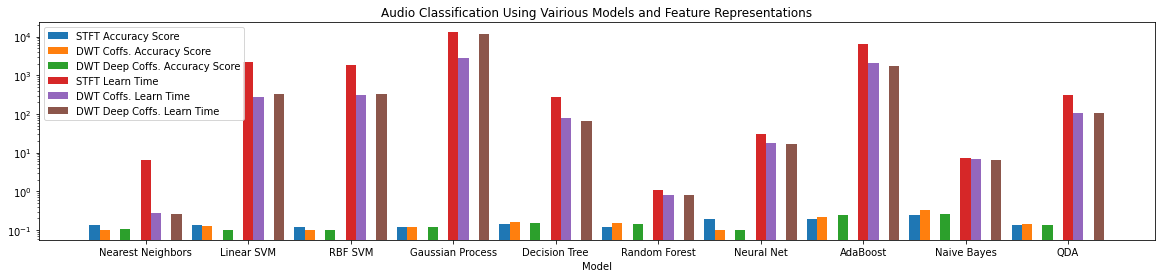

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

x_pos = np.arange(len(names))

fig, axes = plt.subplots(figsize=(20,4))
plt.bar(x_pos - 0.5, stft_score, 0.1, label = 'STFT Accuracy Score')
plt.bar(x_pos - 0.4, dwtC_score, 0.1, label = 'DWT Coffs. Accuracy Score')
plt.bar(x_pos - 0.2, dwtDC_score, 0.1, label = 'DWT Deep Coffs. Accuracy Score')
plt.bar(x_pos, stft_learnTime, 0.1, label = 'STFT Learn Time')
plt.bar(x_pos+0.1, dwtC_learnTime, 0.1, label = 'DWT Coffs. Learn Time')
plt.bar(x_pos+0.3, dwtDC_learnTime, 0.1, label = 'DWT Deep Coffs. Learn Time')
  
plt.xticks(x_pos, names)
plt.xlabel("Model")
axes.set_yscale("log") #the log transformation
plt.title("Audio Classification Using Vairious Models and Feature Representations")
plt.legend()
plt.show()

In [19]:
len(stft_score)

10

### 5.1.2 Laplace on functions and graphs

The Laplace operator can act as a digital filter that, when applied to an image, can be used for edge detection. 

### Image Edge Detection



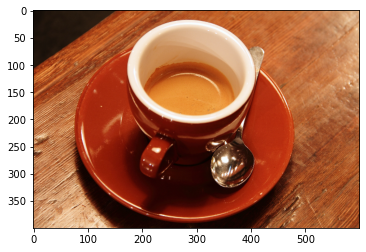

In [119]:
from skimage import data
from skimage.color import rgb2gray

from skimage import img_as_ubyte,img_as_float
coffee_image = img_as_float(data.coffee())  
plt.imshow(coffee_image)

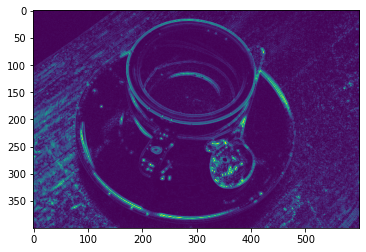

In [121]:
import cv2 as cv

# [variables]
# Declare the variables we are going to use
    
ddepth = cv.CV_16S
kernel_size = 3

src = data.coffee() 
# Check if image is loaded fine
if src is None:
    print ('Error opening image')
else:
    # Remove noise by blurring with a Gaussian filter
    src = cv.GaussianBlur(src, (3, 3), 0)
    # Convert the image to grayscale
    src_gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    # Apply Laplace function
    dst = cv.Laplacian(src_gray, ddepth, ksize=kernel_size)
    # converting back to uint8
    abs_dst = cv.convertScaleAbs(dst)
    plt.imshow(abs_dst)
   


### Spectral Clustering
Another example of using the Laplacian operator is Spectral clustering that is carried out by applying some standard clustering method (such as k-means) on the eigenvectors of the Laplacian matrix, hence partitioning the graph nodes (or the data points) into subsets.

Adopted from https://juanitorduz.github.io/spectral_clustering/

This example uses unsupervised clustering algorithms and how they benefit from better representation. The creation of the dataset already know the circle (y) a datapoint belong to. However, the clustering models estimate the cluster membership from the data coordinates only (X), and we are using y only for colouring. Even metrics in unsupervised ML algorithms are not the accuracy measures, but cluster coherency measures and other distance based metrics.

In [69]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
import seaborn as sns

n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
X, y = noisy_circles
# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


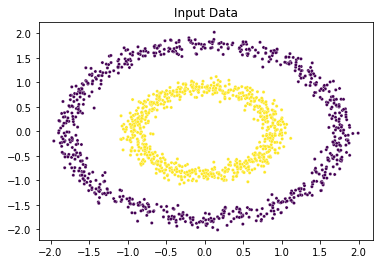

In [58]:
from itertools import cycle, islice

# Plot the input data.
fig, ax = plt.subplots()

sns.scatterplot(X[:, 0], X[:, 1], s=10, c=y, ax=ax)
ax.set(title='Input Data');

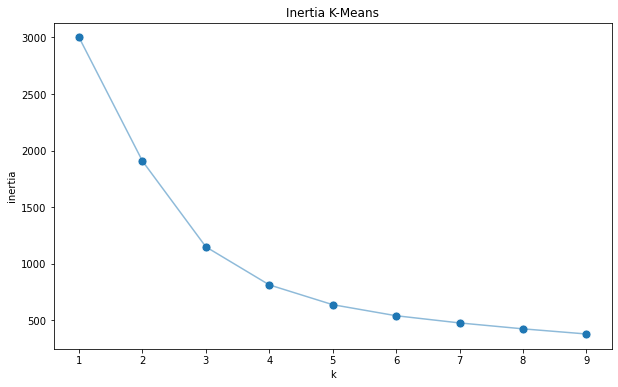

In [67]:
inertias = []

k_candidates = range(1, 10)

# Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid,  
# squaring this distance, and summing these squares across one cluster.

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(X)
    inertias.append(k_means.inertia_) 
    
## the Elbow method; find the point where the decrease in inertia begins to slow. K=3 is the “elbow” of this graph, we know it is two cluster data, we will try both
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


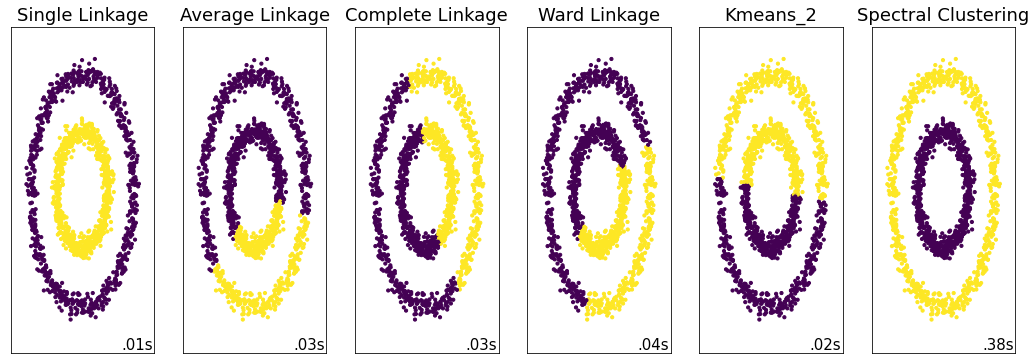

In [77]:
import time
# ============
# Create cluster objects
# ============

params = {"n_neighbors": 10, "n_clusters": 2}    
    
ward = AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="ward")
complete = AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="complete")
average = AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="average")
single = AgglomerativeClustering(n_clusters=params["n_clusters"], linkage="single")
k_means_2 = KMeans(random_state=42, n_clusters=params["n_clusters"])
spec_cl = SpectralClustering(
    n_clusters=params["n_clusters"], 
    random_state=25, 
    n_neighbors=params["n_neighbors"], 
    affinity='nearest_neighbors'
)

clustering_algorithms = (
    ("Single Linkage", single),
    ("Average Linkage", average),
    ("Complete Linkage", complete),
    ("Ward Linkage", ward), 
    ("Kmeans_2", k_means_2), 
    ("Spectral Clustering", spec_cl), ) # this is using eigenvectors of the Laplacian matrix, we will do in details below
plot_num = 1
plt.figure(figsize=(18, 6))
for name, algorithm in clustering_algorithms:
    t0 = time.time()
    algorithm.fit(X)
    t1 = time.time()
    if hasattr(algorithm, "labels_"):
        y_pred = algorithm.labels_.astype(int)
    else:
        y_pred = algorithm.predict(X)

    plt.subplot(1, len(clustering_algorithms), plot_num)
    plt.title(name, size=18)

    plt.scatter(X[:, 0], X[:, 1], s=10, c=y_pred)

    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.xticks(())
    plt.yticks(())
    plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",)
    plot_num += 1

plt.show()

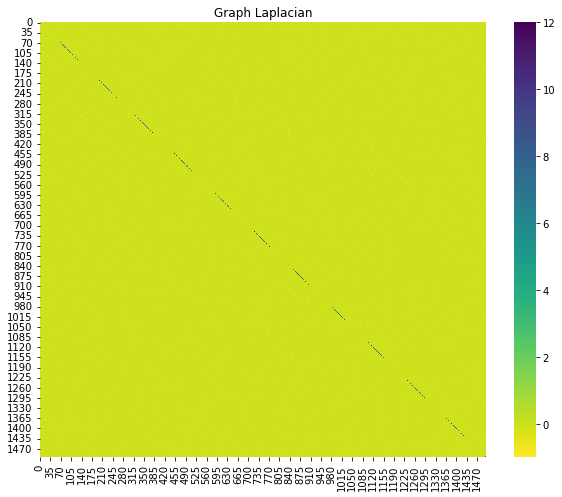

In [80]:
## Step 1: Compute Graph Laplacian

from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    return graph_laplacian 
    
graph_laplacian = generate_graph_laplacian(df=X, nn=8)

# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian');

In [81]:
## Step 2: Compute Spectrum of the Graph Laplacian

from scipy import linalg

eigenvals, eigenvcts = linalg.eig(graph_laplacian)
np.unique(np.imag(eigenvals)) # The eigenvalues are represented by complex numbers. Since Laplacian graph is symmetric, the eigenvalues must be real.

array([0.])

In [82]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.9999999999999996
Max Norm: 1.0000000000000004


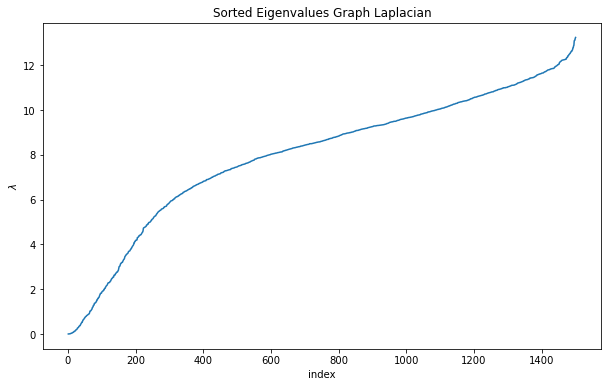

In [84]:
# We then sort the eigenvalues in ascending order.
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]
# Let us plot the sorted eigenvalues.
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

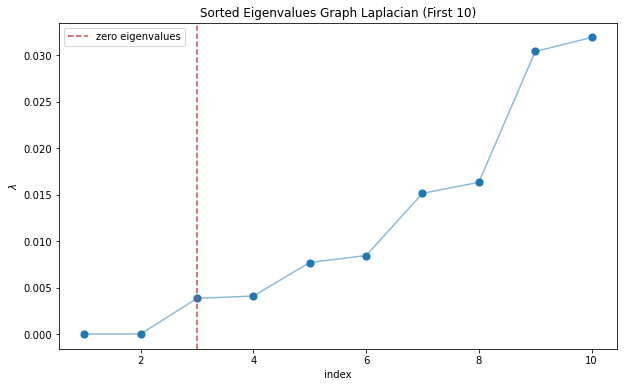

In [85]:
# Step 3: Find the Small Eigenvalues
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');
## From the plot we see see that the first 2 eigenvalues (sorted) are essentially zero.

In [86]:
zero_eigenvals_index = np.argwhere(abs(eigenvals) < 1e-5)
eigenvals[zero_eigenvals_index]

array([[1.80047446e-15],
       [9.03912054e-16]])

In [90]:
## for these small eigenvalues, we consider their corresponding eigenvectors.
import pandas as pd

proj_df = pd.DataFrame(eigenvcts[:, zero_eigenvals_index.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
proj_df.head()

,v_0,v_1
0,0.004073,-0.035858
1,0.036287,0.006895
2,0.004073,-0.035858
3,0.036287,0.006895
4,0.036287,0.006895


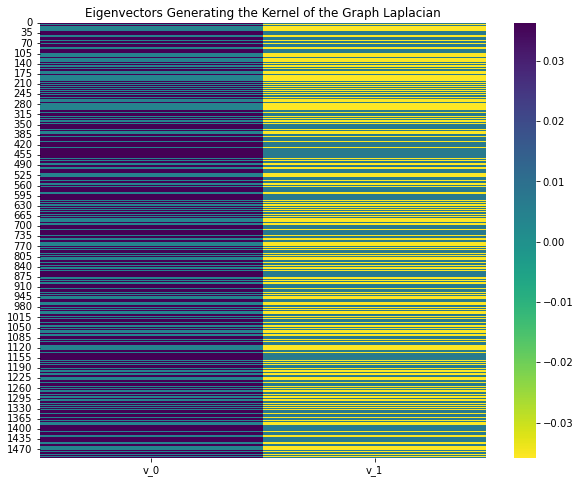

In [91]:
# Let us visualize this data frame as a heat map:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(proj_df, ax=ax, cmap='viridis_r')
ax.set(title='Eigenvectors Generating the Kernel of the Graph Laplacian');

In [92]:
def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[: num_ev]

    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    return proj_df

C:\Users\DELLPR~1\AppData\Local\Temp/ipykernel_7984/1902041793.py:8: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_means.fit(proj_df)


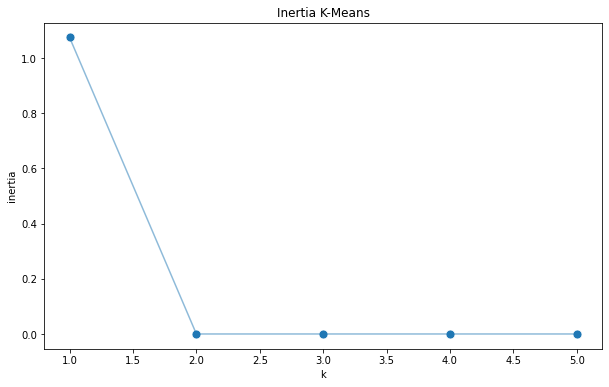

In [93]:
## Step 4: Run K-Means Clustering
inertias = []

k_candidates = range(1, 6)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(proj_df)
    inertias.append(k_means.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

## Now k=2 in the elbow method as well

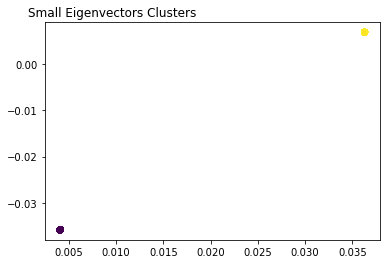

In [108]:
k_means = KMeans(random_state=25, n_clusters=2)
k_means.fit(proj_df)
y_pred = k_means.predict(proj_df)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x=proj_df['v_0'], y=proj_df['v_1'], c=y_pred)
ax.set_title('Small Eigenvectors Clusters', x=0.2);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


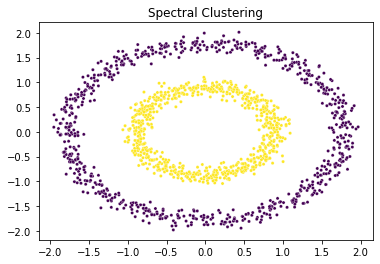

In [109]:
## Step 5: Assign Cluster Tag


fig, ax = plt.subplots()
sns.scatterplot(X[:, 0], X[:, 1], s=10, c=y_pred)
ax.set(title='Spectral Clustering');

In [115]:
## to summarise the above steps
def spectral_clustering(df, n_neighbors, n_clusters):
    """Spectral Clustering Algorithm."""
    graph_laplacian = generate_graph_laplacian(df, n_neighbors)
    eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)
    proj_df = project_and_transpose(eigenvals, eigenvcts, n_clusters)
    k_means = KMeans(random_state=25, n_clusters=2)
    k_means.fit(proj_df)
    y_pred = k_means.predict(proj_df)
    return y_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


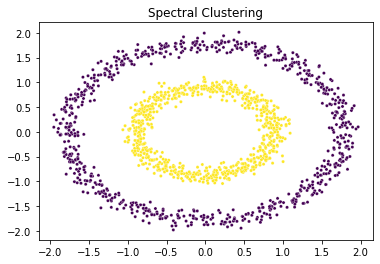

In [116]:
y_pred = spectral_clustering(X, 8, 2)

fig, ax = plt.subplots()
sns.scatterplot(X[:, 0], X[:, 1], s=10, c=y_pred)
ax.set(title='Spectral Clustering');